# Crypto-currency Trade-in Analysis

This analysis is to identify when to trade or buy crytocurrencies and predicting when to either buy or trade. This dataset describes the price of crypto-currencies, volume and market captalisation on a daily basis from 1/1/2016 to 10/1/2020.

In [1]:
# Python Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

path = 'C:\\Users\\Jamie\\Desktop\\NN_Project\\Other projects'

In [2]:
# Filter crypto data
file_loc = path + '\\Datasets\\crypto_tradinds.csv' # File location
file = pd.read_csv(file_loc)
file = file.set_index('trade_date')
currency_types = file['crypto_name'].unique()
currency_array = []
for c in currency_types:
    currency = file[file['crypto_name'] == c]
    currency_array.append(currency)
file.head()

,volume,price_usd,price_btc,market_cap,capitalization_change_1_day,USD_price_change_1_day,BTC_price_change_1_day,crypto_name,crypto_type,ticker,max_supply,site_url,github_url,minable,platform_name,industry_name
trade_date,,,,,,,,,,,,,,,,
2016-01-01,36278900.0,434.33,1.0,6.529300e+09,0.000000,0.000000,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,NaN,Proof of Work (PoW)
2016-01-02,30096600.0,433.44,1.0,6.517390e+09,-0.001824,-0.002049,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,NaN,Proof of Work (PoW)
2016-01-03,39633800.0,430.01,1.0,6.467430e+09,-0.007666,-0.007913,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,NaN,Proof of Work (PoW)
2016-01-04,38477500.0,433.09,1.0,6.515713e+09,0.007466,0.007163,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,NaN,Proof of Work (PoW)
2016-01-05,34522600.0,431.96,1.0,6.500393e+09,-0.002351,-0.002609,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,NaN,Proof of Work (PoW)


In [4]:
# Bitcoin Google searches
word_searches = path + "\\Data Analysis\\1. Crypto_trade-in\\multiTimeline.csv"
words = pd.read_csv(word_searches)
words.head()

,Category: All categories
Week,Bitcoin: (Worldwide)
2016-01-03,3
2016-01-10,3
2016-01-17,3
2016-01-24,3


To identify the contribution of the ups and downs of bitcoin we need to explore diverse trends of unique variables. The analysis of the variables can range from both inside or outside the dataset inorder to gain a broad understanding of volatility of crypto-currencies.

In [5]:
# Trend of bitcoin between 2016 and 2020
warnings.filterwarnings('ignore')
prices = pd.concat([currency_array[0]['price_usd'], currency_array[1]['price_usd']], axis=1).reindex(currency_array[0].index)
prices.head()

,price_usd,price_usd
trade_date,,
2016-01-01,434.33,0.948024
2016-01-02,433.44,0.937124
2016-01-03,430.01,0.971905
2016-01-04,433.09,0.954480
2016-01-05,431.96,0.950176


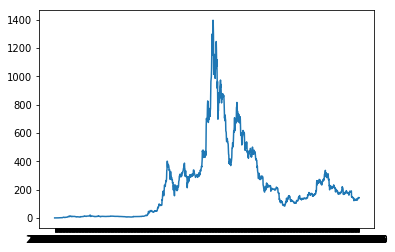

In [6]:
crypto_0 = currency_array[1] # Etherium
price_0 = crypto_0['price_usd']
plt.plot(price_0)

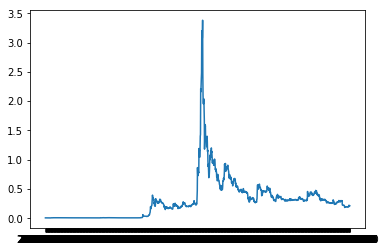

In [7]:
crypto_1 = currency_array[2] # Other crypto-currency
price_1 = crypto_1['price_usd']
plt.plot(price_1)